In [1]:
%matplotlib widget
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
from models import Net_4_layers_v1 as CurrentModel

Import data.

In [2]:
data_a = np.load("../data/dataset_all_V1_bootstrap_O3a.npy")
data_b = np.load("../data/dataset_all_V1_bootstrap_O3b.npy")
data_total = np.vstack([data_a, data_b])

Refering data.

In [3]:
pd.DataFrame(data_total)

,0,1,2,3,4,5,6
0,9.517451,7.082010,152.196493,30.715828,-0.144738,0.104227,4.0
1,23.934838,11.774585,67.339999,7.718377,-0.861250,-0.467627,1.0
2,8.322346,5.146934,93.468914,17.888047,-0.203238,-0.012615,4.0
3,9.122890,11.532085,325.987187,45.616315,0.129675,0.135129,3.0
4,11.770522,6.543893,59.974914,6.295871,-0.770255,-0.284936,1.0
...,...,...,...,...,...,...,...
46795,15.208135,16.689965,73.212873,9.390564,0.108179,0.112250,2.0
46796,4.233904,1.076624,63.777395,11.814693,0.190787,-0.057725,0.0
46797,5.026195,1.432085,46.993963,4.891975,0.714362,-0.165378,0.0
46798,63.441778,170.114356,76.599024,9.332361,-0.533035,-0.362329,2.0


Divide data into training set, validating set and testing set.

In [4]:
data_length = len(data_total)

training_set_length = int(data_length * 0.7)
validating_set_length = int(data_length * 0.2)
testing_set_length = data_length - training_set_length #- validating_set_length

training_set = data_total[0:training_set_length, :]
validating_set = data_total[training_set_length:training_set_length + validating_set_length, :]
testing_set = data_total[training_set_length:, :]

Determine the device.

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Make the data suitable to pytorch.

In [6]:
input_tensor_training = torch.tensor(training_set[:, 0:6], dtype=torch.float32).to(device)
label_tensor_training = torch.tensor(training_set[:, 6], dtype=torch.int64).to(device)

input_tensor_validating = torch.tensor(validating_set[:, 0:6], dtype=torch.float32).to(device)
label_tensor_validating = torch.tensor(validating_set[:, 6], dtype=torch.int64).to(device)

input_tensor_testing = torch.tensor(testing_set[:, 0:6], dtype=torch.float32).to(device)
label_tensor_testing = torch.tensor(testing_set[:, 6], dtype=torch.int64).to(device)

dataset_training = TensorDataset(input_tensor_training, label_tensor_training)
dataset_validating = TensorDataset(input_tensor_validating, label_tensor_validating)
dataset_testing = TensorDataset(input_tensor_testing, label_tensor_testing)

loader_training = DataLoader(dataset_training, batch_size=32, shuffle=True)
loader_validating = DataLoader(dataset_validating, batch_size=32, shuffle=True)
loader_testing = DataLoader(dataset_testing, batch_size=32, shuffle=True)

Define the model, criterion and optimizer.

In [7]:
model = CurrentModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.000025)

In [8]:
import torch

# Your training loop
loss_average_list = []
accuracy_average_list = []
test_loss_average_list = []
test_accuracy_average_list = []

for epoch in tqdm(range(1000), desc="Training ..."):
    model.train()  # Set the model to training mode
    correct_predictions = 0
    total_samples = 0
    loss_array = []

    for data in loader_training:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_array.append(loss.item())

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    loss_average = sum(loss_array) / len(loss_array)
    accuracy_average = correct_predictions / total_samples
    loss_average_list.append(loss_average)
    accuracy_average_list.append(accuracy_average)

    #validation loop
    model.eval()  
    correct_predictions_test = 0
    total_samples_test = 0
    loss_array_test = []

    with torch.no_grad():  # Disable gradient computation during testing
        for data in loader_testing:
            inputs_test, labels_test = data[0].to(device), data[1].to(device)
            outputs_test = model(inputs_test)
            loss_test = criterion(outputs_test, labels_test)
            loss_array_test.append(loss_test.item())

            _, predicted_test = torch.max(outputs_test, 1)
            correct_predictions_test += (predicted_test == labels_test).sum().item()
            total_samples_test += labels_test.size(0)

    loss_average_test = sum(loss_array_test) / len(loss_array_test)
    accuracy_average_test = correct_predictions_test / total_samples_test

    test_loss_average_list.append(loss_average_test)
    test_accuracy_average_list.append(accuracy_average_test)

Training ...: 100%|██████████| 1000/1000 [14:13<00:00,  1.17it/s]


Plot the loss and average.

In [9]:
#with open('outputLoss10000e-4lr.txt', 'w') as file:
 #   file.write('\n'.join(map(str, loss_average_list)))
    
#with open('outputAcc10000e-4lr.txt', 'w') as file:
 #   file.write('\n'.join(map(str, accuracy_average_list)))

#with open('outputTestLoss10000e-4lr.txt', 'w') as file:
 #   file.write('\n'.join(map(str, test_loss_average_list)))
    
#with open('outputTestAcc10000e-4lr.txt', 'w') as file:
 #   file.write('\n'.join(map(str, test_accuracy_average_list)))

In [9]:
values = [loss_average_list[-1],accuracy_average_list[-1],test_loss_average_list[-1],test_accuracy_average_list[-1]]
print(values)

[0.4008189395899535, 0.852742757715437, 0.41401993929660946, 0.848301403033972]


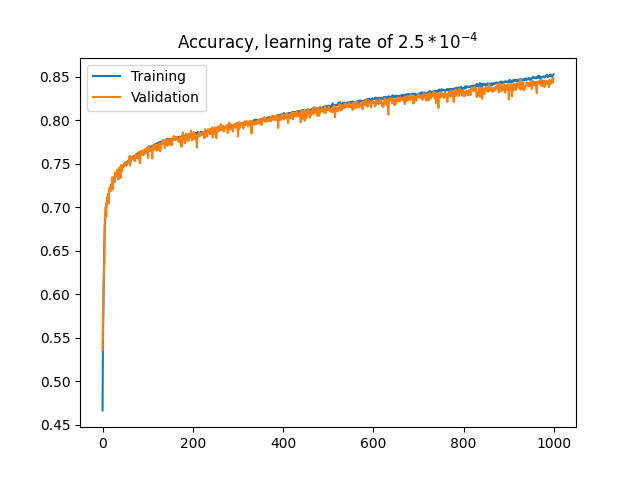

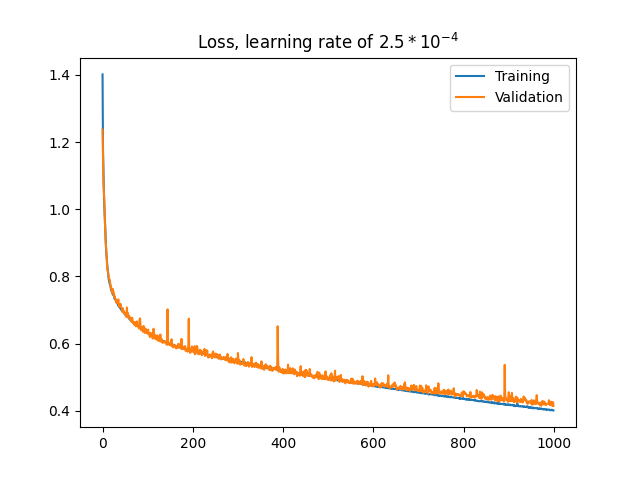

In [10]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.plot(loss_average_list, label="Training")
ax1.plot(test_loss_average_list, label="Validation")
#ax1.set_yscale("log")
ax1.legend()
ax1.set_title("Loss, learning rate of $2.5*10^{-4}$")


fig2, ax2 = plt.subplots()
ax2.plot(accuracy_average_list, label="Training")
ax2.plot(test_accuracy_average_list, label="Validation")
ax2.legend()
ax2.set_title("Accuracy, learning rate of $2.5*10^{-4}$")

plt.show()



Judge the model.

In [12]:
model.eval()
all_predictions = []
all_labels = []

In [13]:
with torch.no_grad():
    for inputs, labels in loader_training:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

Calculate accuracy.

In [14]:
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5041057419335144


In [15]:
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47      5426
           1       0.40      0.00      0.01      5470
           2       0.90      0.84      0.87      5473
           3       0.36      0.86      0.51      5460
           4       0.33      0.32      0.32      5490
           5       0.66      0.56      0.61      5440

    accuracy                           0.50     32759
   macro avg       0.53      0.50      0.46     32759
weighted avg       0.53      0.50      0.46     32759



In [16]:
print(confusion_matrix(all_labels, all_predictions))

[[2388    0   39 1682  246 1071]
 [ 498   21  195 2146 2425  185]
 [   0   13 4624  141  689    6]
 [ 323    0   90 4712   61  274]
 [ 193    0   96 3464 1737    0]
 [1313   18   84  892  101 3032]]


Model name.

In [17]:
model_name = "test"

Save the model.

In [18]:
torch.save(model.state_dict(), "../src/" + model_name)

Load the model.

In [19]:
model = CurrentModel().to(device)
model.load_state_dict(torch.load("../src/" + model_name))

<All keys matched successfully>